<a href="https://colab.research.google.com/github/MananDesai2997/MananDesai2997/blob/main/Day2_pandas_and_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Manipulation

## What is a library in python?
It is nothing but a collection of functions used to accomplish a common objective.

For eg., if we want to work with tables, we would use "pandas". For mathematical operations, we use "math"

In [ ]:
# Data manipulation libraries:
import io
import pandas as pd

## The pandas library
According to the [Wikipedia page for pandas](https://en.wikipedia.org/wiki/Pandas_(software)#:~:text=pandas%20is%20a%20software%20library,for%20data%20manipulation%20and%20analysis.&text=The%20name%20is%20derived%20from,periods%20for%20the%20same%20individuals.), the name is derived from the term "panel data", an econometrics term for data sets that include observations over multiple time periods for the same individuals.

PS: It has nothing to do with the Kung Fu type pandas :D

### A pandas DataFrame
It is nothing but a collection of rows and columns arranged in a structed tabular format with values inside. Basically, pandas DataFrame is a 2D dictionary i.e. it is a 2D Data Structure in python.

In very simple terms, it is equivalent to an Excel Worksheet.

In [ ]:
# Let's build a small dataframe from scratch
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)

In [ ]:
df

,col1,col2
0,1,3
1,2,4


In [ ]:
# df.loc["index", "col"]

In [ ]:
df.loc[0, "col1"]

1

In [ ]:
df.loc[0, "col2"]

3

In [ ]:
df.loc[1, "col1"]

2

In [ ]:
df.loc[1, "col2"]

4

**Reassigning element value**

In [ ]:
df.loc[1, "col2"] = 44

In [ ]:
df

,col1,col2
0,1,3
1,2,44


**Add a new column (As is always the case whenever latest data comes in):**

In [ ]:
df["col3"] = [5, 6]

In [ ]:
df

,col1,col2,col3
0,1,3,5
1,2,44,6


**Access columns (don’t require .loc() parameter):**

In [ ]:
df["col1"]

0    1
1    2
Name: col1, dtype: int64

**Notice the double and single brackets for accessing multiple and single column respectively; more than 1 column: use list**

In [ ]:
# Access col1 and col3:
df[["col1", "col3"]]

,col1,col3
0,1,5
1,2,6


In [ ]:
df

,col1,col2,col3
0,1,3,5
1,2,44,6


**Add row; row name/index=2 not mandatory, can give other int, float, string name**

In [ ]:
df.loc[2] = [7, 8, 9]

In [ ]:
df

,col1,col2,col3
0,1,3,5
1,2,44,6
2,7,8,9


In [ ]:
# Add 3 more rows in df:
df.loc[3] = ["a", "b", "c"]
df.loc[4] = ["d", True, "f"]

In [ ]:
df

,col1,col2,col3
0,1,3,5
1,2,44,6
2,7,8,9
3,a,b,c
4,d,True,f


In [ ]:
# Access 1st, fifth & third row in col1 and col3: in given order: 3 after 5
df.loc[[0, 4, 2], ["col1", "col3"]]

,col1,col3
0,1,5
4,d,f
2,7,9


### Upload csv file & Reading a csv file as a pandas DataFrame

**Import io: extra input/output functionality**

In [ ]:
import io
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving isl_data.csv to isl_data (1).csv


In [ ]:
isl_df = pd.read_csv(io.BytesIO(uploaded['isl_data.csv']))
isl_df

,team.name,position,matches,wins,losses,draws,scoresFor,scoresAgainst,points
0,Mumbai City FC,1,20,12,4,4,35,18,40
1,ATK Mohun Bagan FC,2,20,12,4,4,28,15,40
2,Northeast United,3,20,8,3,9,31,25,33
3,FC Goa,4,20,7,3,10,31,23,31
4,Hyderabad FC,5,20,6,3,11,27,19,29
5,Jamshedpur,6,20,7,7,6,21,22,27
6,Bengaluru FC,7,20,5,8,7,26,28,22
7,Chennaiyin FC,8,20,3,6,11,17,23,20
8,SC East Bengal,9,20,3,9,8,22,33,17
9,Kerala Blasters,10,20,3,9,8,23,36,17


### Simple pandas operations

**Data Cleaning and preprocessing**

**In pandas string datatype defined as object (other than Boolean, date-time or numerical)**

In [ ]:
# Get summary information of the dataframe: FIRST STEP WHEN YOU GET DATA FROM EXTERNAL SOURCE
isl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   team.name      11 non-null     object
 1   position       11 non-null     int64 
 2   matches        11 non-null     int64 
 3   wins           11 non-null     int64 
 4   losses         11 non-null     int64 
 5   draws          11 non-null     int64 
 6   scoresFor      11 non-null     int64 
 7   scoresAgainst  11 non-null     int64 
 8   points         11 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 920.0+ bytes


.describe() Descriptive Stats: Related to numerics, date-time; NOT Text; Hence team name is excluded

.round(1): 1 digit after decimal
;count: non-null entries in the column

In [ ]:
# Basic statitical values for each column:
isl_df.describe().round(1)

,position,matches,wins,losses,draws,scoresFor,scoresAgainst,points
count,11.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
mean,6.0,20.0,6.2,6.2,7.6,26.0,26.0,26.2
std,3.3,0.0,3.5,3.1,2.5,5.2,8.6,9.4
min,1.0,20.0,2.0,3.0,4.0,17.0,15.0,12.0
25%,3.5,20.0,3.0,3.5,6.0,22.5,20.5,18.5
50%,6.0,20.0,6.0,6.0,8.0,26.0,23.0,27.0
75%,8.5,20.0,7.5,8.5,9.5,29.5,30.5,32.0
max,11.0,20.0,12.0,12.0,11.0,35.0,44.0,40.0


In [ ]:
isl_df["scoresFor"].sum()

286

#### Filtering and slicing techniques

##### Slicing using loc parameter

df.iloc[-1]: last row entries--> reverse parameter use iloc

In [ ]:
isl_df.iloc[-1]

team.name        Odisha Football Club
position                           11
matches                            20
wins                                2
losses                             12
draws                               6
scoresFor                          25
scoresAgainst                      44
scoresDiff                        -19
points                             12
Name: 10, dtype: object

In [ ]:
# Get the information for the 1st ranked team:
# Since we know that the 1st ranked team is on the first row, we can use the loc parameter and insert the index value directly
isl_df.loc[0]

team.name        Mumbai City FC
position                      1
matches                      20
wins                         12
losses                        4
draws                         4
scoresFor                    35
scoresAgainst                18
points                       40
Name: 0, dtype: object

In [ ]:
isl_df["position"] == 1

0      True
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
Name: position, dtype: bool

In [ ]:
# Let's say that we do not know for sure in which row is the info for the team ranked 1st.
# This uncertainity can be easily rectified by replacing the index value with a condition.
isl_df.loc[isl_df["position"] == 1]

,team.name,position,matches,wins,losses,draws,scoresFor,scoresAgainst,points
0,Mumbai City FC,1,20,12,4,4,35,18,40


In [ ]:
# Let's see what is happening inside those brackets:
isl_df["scoresFor"] > 25

0      True
1      True
2      True
3      True
4      True
5     False
6      True
7     False
8     False
9     False
10    False
Name: scoresFor, dtype: bool

In [ ]:
isl_df.loc[isl_df["scoresFor"] > 25]

,team.name,position,matches,wins,losses,draws,scoresFor,scoresAgainst,points
0,Mumbai City FC,1,20,12,4,4,35,18,40
1,ATK Mohun Bagan FC,2,20,12,4,4,28,15,40
2,Northeast United,3,20,8,3,9,31,25,33
3,FC Goa,4,20,7,3,10,31,23,31
4,Hyderabad FC,5,20,6,3,11,27,19,29
6,Bengaluru FC,7,20,5,8,7,26,28,22


In [ ]:
# Now let's obtain only the team name for the same condition as above and not all the columns.
isl_df.loc[isl_df["scoresFor"] > 25, ["team.name", 'scoresFor']]

,team.name,scoresFor
0,Mumbai City FC,35
1,ATK Mohun Bagan FC,28
2,Northeast United,31
3,FC Goa,31
4,Hyderabad FC,27
6,Bengaluru FC,26


In [ ]:
# We can even put it inside a list:
isl_df.loc[isl_df["scoresFor"] > 25, "team.name"].to_list()

['Mumbai City FC',
 'ATK Mohun Bagan FC',
 'Northeast United',
 'FC Goa',
 'Hyderabad FC',
 'Bengaluru FC']

In [ ]:
# Now let's look at multiple conditions: 
isl_df.loc[(isl_df["scoresFor"] > 25) & (isl_df["scoresAgainst"] < 25), "team.name"]

0        Mumbai City FC
1    ATK Mohun Bagan FC
3                FC Goa
4          Hyderabad FC
Name: team.name, dtype: object

In [ ]:
# Now let's look at multiple conditions: 
isl_df.loc[(isl_df["scoresFor"] > 25) & (isl_df["scoresAgainst"] <= 25), "team.name"]

0        Mumbai City FC
1    ATK Mohun Bagan FC
2      Northeast United
3                FC Goa
4          Hyderabad FC
Name: team.name, dtype: object

##### Add a new column

In [ ]:
# Let's add a column called "Score difference"
# There are 2 ways to add a new column --> at the end of the dataframe or at a specific location in the dataframe

In [ ]:
isl_df

,team.name,position,matches,wins,losses,draws,scoresFor,scoresAgainst,scoresDiff,points
0,Mumbai City FC,1,20,12,4,4,35,18,17,40
1,ATK Mohun Bagan FC,2,20,12,4,4,28,15,13,40
2,Northeast United,3,20,8,3,9,31,25,6,33
3,FC Goa,4,20,7,3,10,31,23,8,31
4,Hyderabad FC,5,20,6,3,11,27,19,8,29
5,Jamshedpur,6,20,7,7,6,21,22,-1,27
6,Bengaluru FC,7,20,5,8,7,26,28,-2,22
7,Chennaiyin FC,8,20,3,6,11,17,23,-6,20
8,SC East Bengal,9,20,3,9,8,22,33,-11,17
9,Kerala Blasters,10,20,3,9,8,23,36,-13,17


In [ ]:
isl_df["scoresFor"].sub(isl_df["scoresAgainst"])

0     17
1     13
2      6
3      8
4      8
5     -1
6     -2
7     -6
8    -11
9    -13
10   -19
dtype: int64

In [ ]:
# At the end of the dataframe:
isl_df["scoreDiff"] = isl_df["scoresFor"].sub(isl_df["scoresAgainst"])

In [ ]:
isl_df

,team.name,position,matches,wins,losses,draws,scoresFor,scoresAgainst,points,scoreDiff
0,Mumbai City FC,1,20,12,4,4,35,18,40,17
1,ATK Mohun Bagan FC,2,20,12,4,4,28,15,40,13
2,Northeast United,3,20,8,3,9,31,25,33,6
3,FC Goa,4,20,7,3,10,31,23,31,8
4,Hyderabad FC,5,20,6,3,11,27,19,29,8
5,Jamshedpur,6,20,7,7,6,21,22,27,-1
6,Bengaluru FC,7,20,5,8,7,26,28,22,-2
7,Chennaiyin FC,8,20,3,6,11,17,23,20,-6
8,SC East Bengal,9,20,3,9,8,22,33,17,-11
9,Kerala Blasters,10,20,3,9,8,23,36,17,-13


In [ ]:
# Drop the column to reuse the same name:
isl_df.drop(columns=["scoreDiff"], inplace=True)

In [ ]:
# At a specific location:
isl_df.insert(8, "scoresDiff", isl_df["scoresFor"].sub(isl_df["scoresAgainst"]))

ValueError: ignored

In [ ]:
isl_df

,team.name,position,matches,wins,losses,draws,scoresFor,scoresAgainst,scoresDiff,points
0,Mumbai City FC,1,20,12,4,4,35,18,17,40
1,ATK Mohun Bagan FC,2,20,12,4,4,28,15,13,40
2,Northeast United,3,20,8,3,9,31,25,6,33
3,FC Goa,4,20,7,3,10,31,23,8,31
4,Hyderabad FC,5,20,6,3,11,27,19,8,29
5,Jamshedpur,6,20,7,7,6,21,22,-1,27
6,Bengaluru FC,7,20,5,8,7,26,28,-2,22
7,Chennaiyin FC,8,20,3,6,11,17,23,-6,20
8,SC East Bengal,9,20,3,9,8,22,33,-11,17
9,Kerala Blasters,10,20,3,9,8,23,36,-13,17


# Plotting

It is one of the most important forms of communication for Data Scienctists, especially for Football Analysts. It is the best way to explain and express your analysis and ideas to coaches and players.

library.sublibrary

## The matplotlib library

In [ ]:
# matplotlib library is used to plot graphs (bar graph, scatter plot)
import matplotlib.pyplot as plt

In [ ]:
# x axis, y axis

# 2016, 2017, 2018, 2019, 2020
# 45, 54, 63, 70, 54

In [ ]:
# for giving x-axis/y-axis, we can give it in form of list, range or pandas series

season = [2016, 2017, 2018, 2019, 2020] 
goals = [190, 213, 182, 196, 201]

### Bar Plot

<BarContainer object of 5 artists>

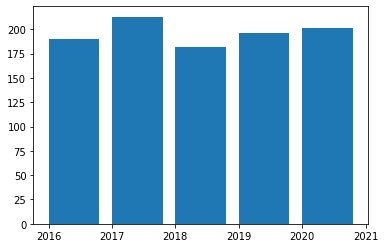

In [ ]:
plt.bar(season, goals, bottom=None, align='edge') # bar function - x_axis, y_axis

### Scatter Plot

.figure(length, height)

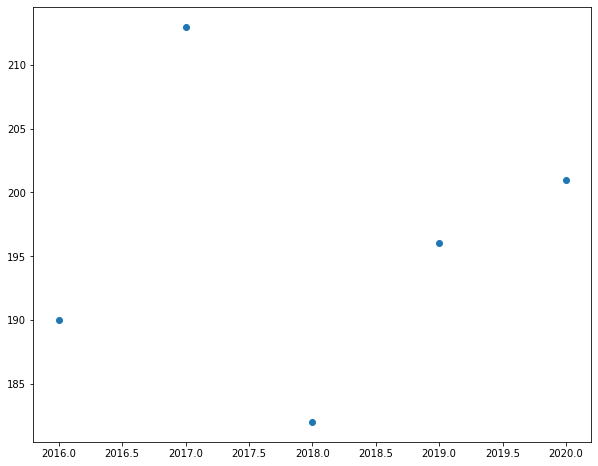

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(season, goals)

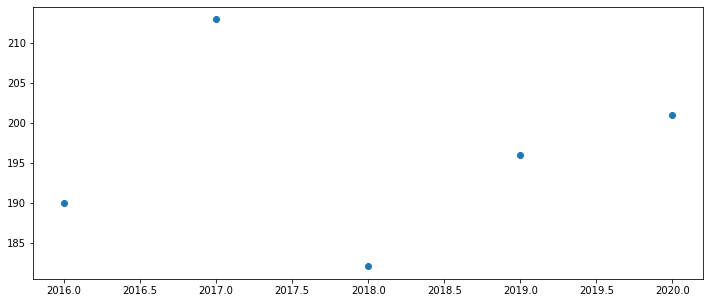

In [ ]:
plt.figure(figsize=(12, 5))
plt.scatter(season, goals)

x-axis values called as xticks

([<matplotlib.axis.XTick at 0x7f883b048d90>,
 <a list of 5 Text major ticklabel objects>)

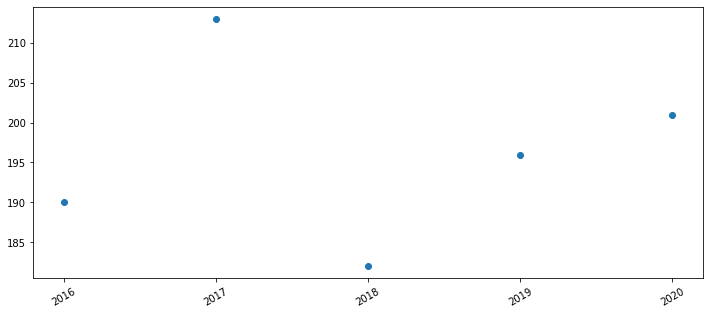

In [ ]:
plt.figure(figsize=(12, 5))
plt.scatter(season, goals)
plt.xticks(season, rotation=30)

### Adding colors to plots

<BarContainer object of 5 artists>

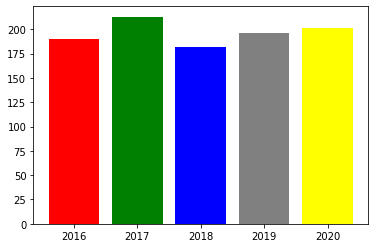

In [ ]:
# color parameter is used to give colors to each bar of bar graph
plt.bar(season, goals, color = ["red", "green", "blue", "grey", "yellow"])

In [ ]:
print(season)
print(goals)

[2016, 2017, 2018, 2019, 2020]
[190, 213, 182, 196, 201]


In [ ]:
colors = []

In [ ]:
colors.append(2)

In [ ]:
print(colors)

[2]


In [ ]:
# If the goals are less than or equal to 190, then color it as red, if they are greater than or equal to 200, color them green, else yellow everywhere

colors = []
for i in goals:
    if i<=190:
        colors.append("Red")
    elif i>=200:
        colors.append("Green")
    else:
        colors.append("Yellow")

colors

['Red', 'Green', 'Red', 'Yellow', 'Green']

<BarContainer object of 5 artists>

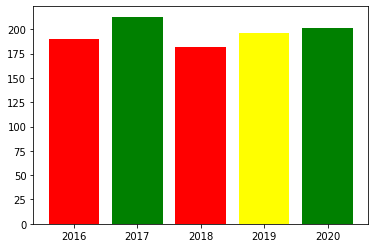

In [ ]:
plt.bar(season, goals, color=colors)

## The seaborn library

In [ ]:
# seaborn is a library built on top of matplotlib and is very efficient and easy-to-use when it comes to dataframes
import seaborn as sns

In [ ]:
isl_df

,team.name,position,matches,wins,losses,draws,scoresFor,scoresAgainst,scoresDiff,points
0,Mumbai City FC,1,20,12,4,4,35,18,17,40
1,ATK Mohun Bagan FC,2,20,12,4,4,28,15,13,40
2,Northeast United,3,20,8,3,9,31,25,6,33
3,FC Goa,4,20,7,3,10,31,23,8,31
4,Hyderabad FC,5,20,6,3,11,27,19,8,29
5,Jamshedpur,6,20,7,7,6,21,22,-1,27
6,Bengaluru FC,7,20,5,8,7,26,28,-2,22
7,Chennaiyin FC,8,20,3,6,11,17,23,-6,20
8,SC East Bengal,9,20,3,9,8,22,33,-11,17
9,Kerala Blasters,10,20,3,9,8,23,36,-13,17


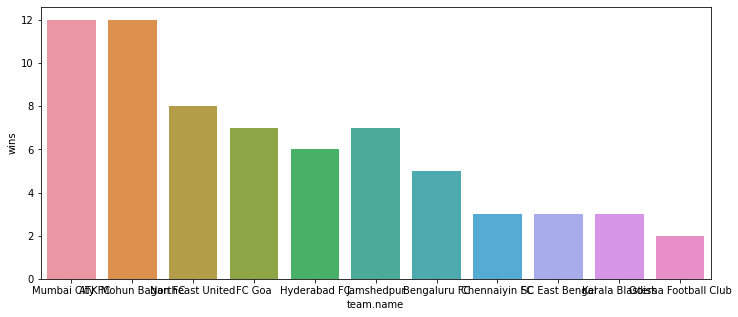

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(x="team.name", y="wins", data=isl_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

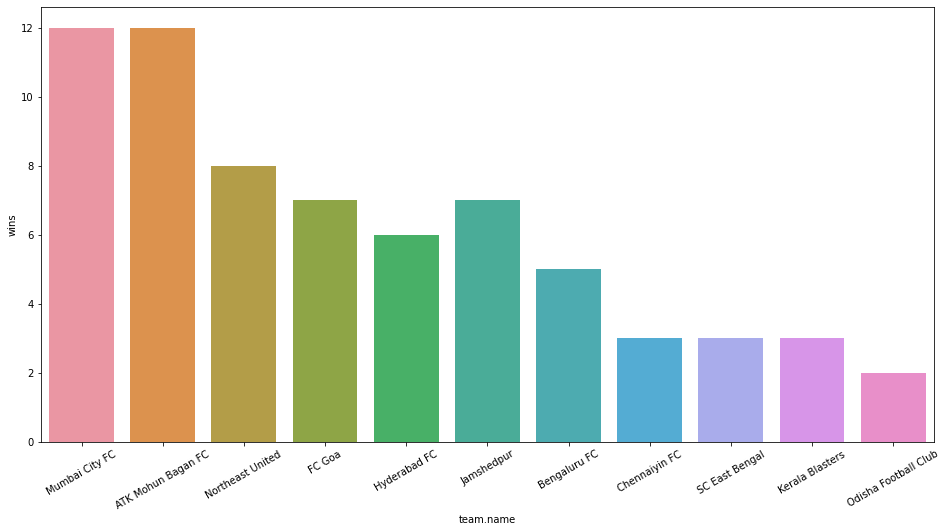

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(x="team.name", y="wins", data=isl_df)
plt.xticks(rotation=30)

Text(0.5, 0, '')

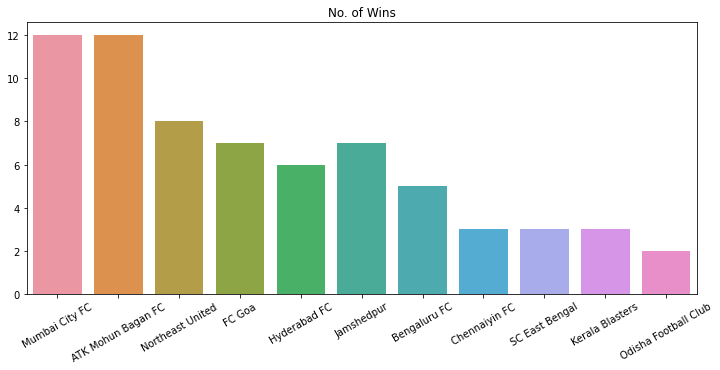

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x="team.name", y="wins", data=isl_df)
plt.xticks(rotation=30)
plt.title("No. of Wins")
plt.ylabel("")
plt.xlabel("")

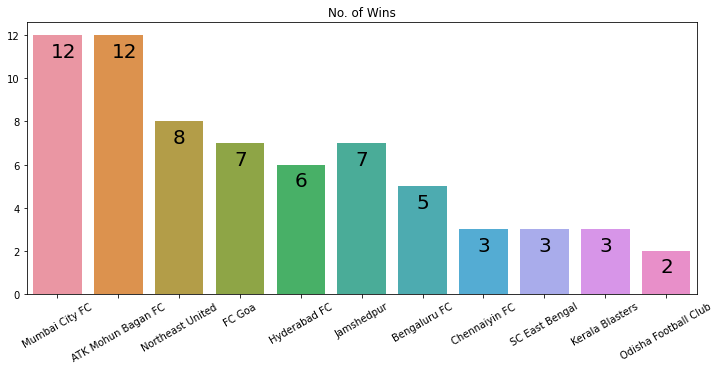

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x="team.name", y="wins", data=isl_df)
plt.xticks(rotation=30)
plt.title("No. of Wins")
plt.ylabel("")
plt.xlabel("")
# Let's add some labels to the bars:
for p, label in zip(ax.patches, isl_df["wins"].values):
    ax.annotate(label, (p.get_x() + 0.3, p.get_height() - 1), size=20)

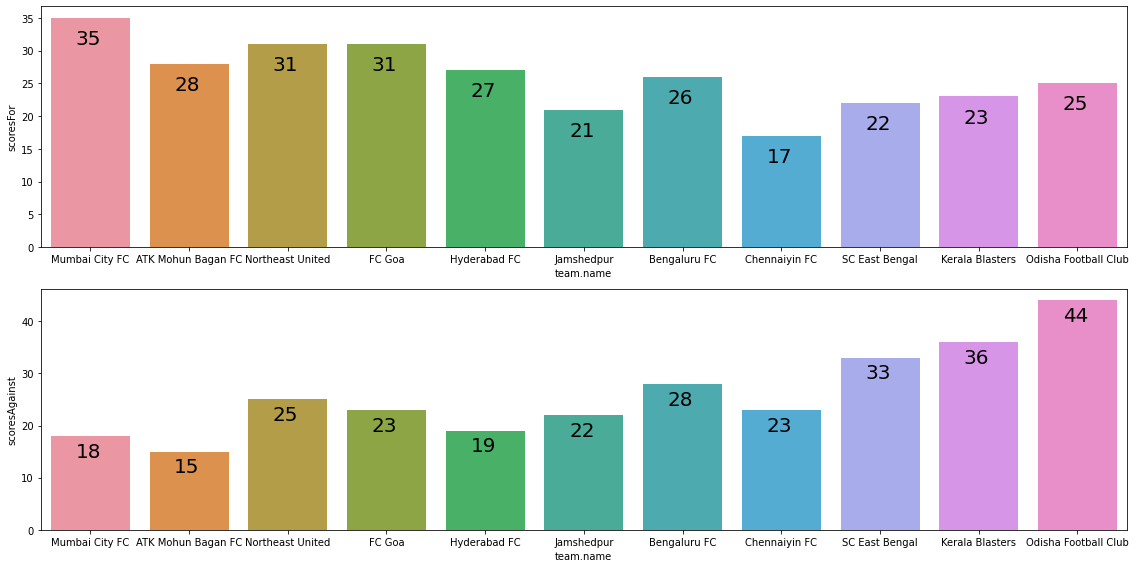

In [ ]:
# Bonus Lecture:

fig, ax_sp = plt.subplots(2, 1, figsize=(16, 8))
sns.barplot(data=isl_df, x="team.name", y="scoresFor", ax=ax_sp[0])
sns.barplot(data=isl_df, x="team.name", y="scoresAgainst", ax=ax_sp[1])
# Annotate the graph i.e add data labels:
for p, label in zip(ax_sp[0].patches, isl_df["scoresFor"].values):
    ax_sp[0].annotate(label, (p.get_x() + 0.25, p.get_height() - 4), size=20)
for p, label in zip(ax_sp[1].patches, isl_df["scoresAgainst"].values):
    ax_sp[1].annotate(label, (p.get_x() + 0.25, p.get_height() - 4), size=20)
plt.tight_layout()